# Import dataset

In [ ]:
df = pd.read_csv('alzheimers_disease_data.csv')

# Import library

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import ParameterGrid
%matplotlib inline

sns.set_theme(style='darkgrid')

# Pre processing

In [ ]:
display(df.head().T)
df.info()

# Display missing and duplicate values
print("Missing values per column:")
print(df.isnull().sum())
print(f"\nDuplicates: {df.duplicated().sum()}")

,0,1,2,3,4
PatientID,4751,4752,4753,4754,4755
Age,73,89,73,74,89
Gender,0,0,0,1,0
Ethnicity,0,0,3,0,0
EducationLevel,2,0,1,1,0
BMI,22.927749,26.827681,17.795882,33.800817,20.716974
Smoking,0,0,0,1,0
AlcoholConsumption,13.297218,4.542524,19.555085,12.209266,18.454356
PhysicalActivity,6.327112,7.619885,7.844988,8.428001,6.310461
DietQuality,1.347214,0.518767,1.826335,7.435604,0.795498


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [ ]:
# Drop unnecessary columns
df = df.drop(columns=['PatientID', 'DoctorInCharge'])

# Numerical columns have more than 10 unique values
numerical_columns = [col for col in df.columns if df[col].nunique() > 10]

# Categorical columns that are not 'Diagnosis'
categorical_columns = df.columns.difference(numerical_columns).difference(['Diagnosis']).to_list()

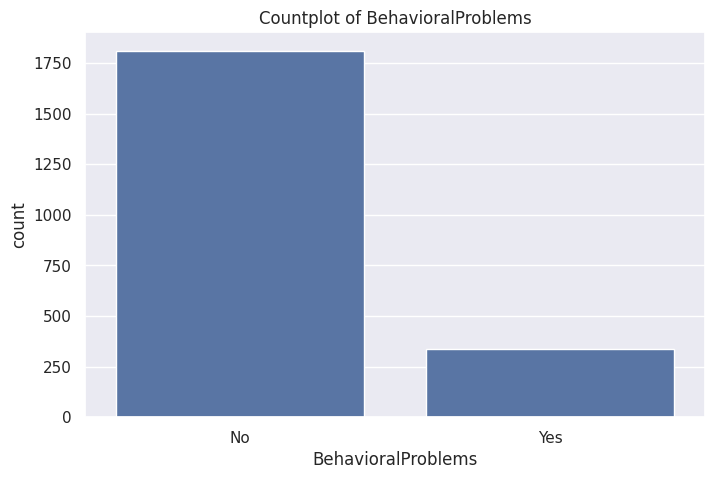

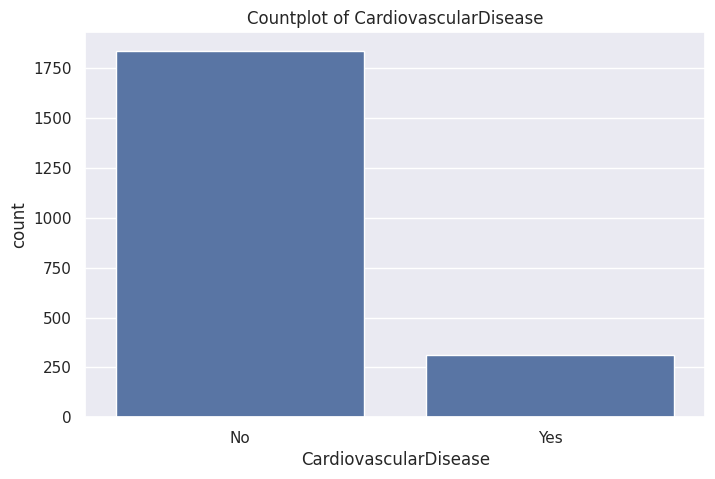

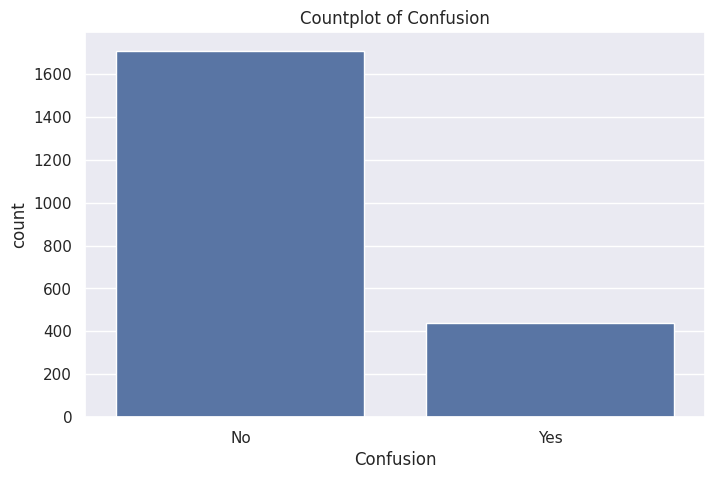

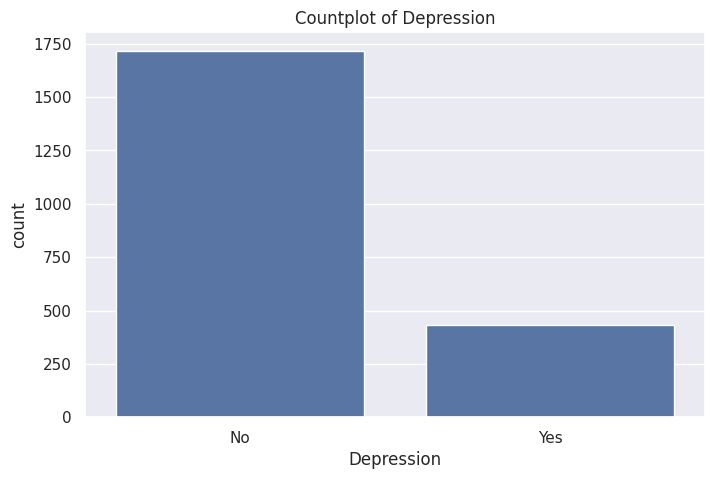

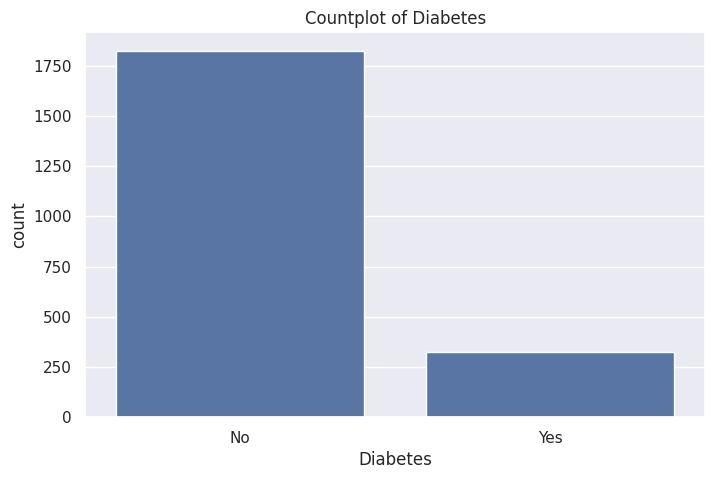

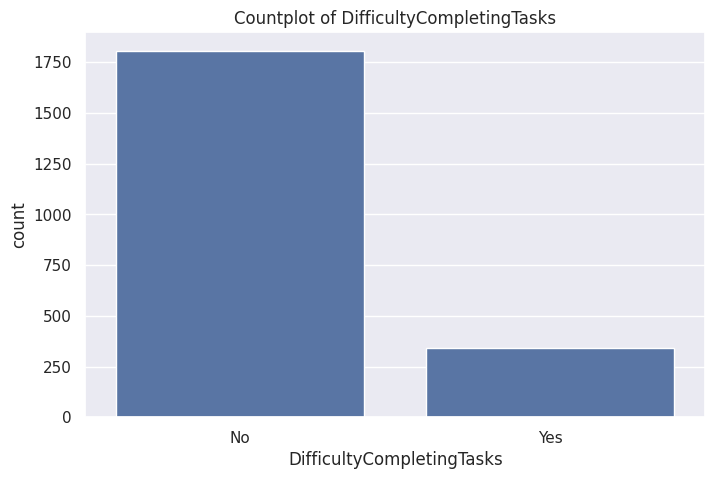

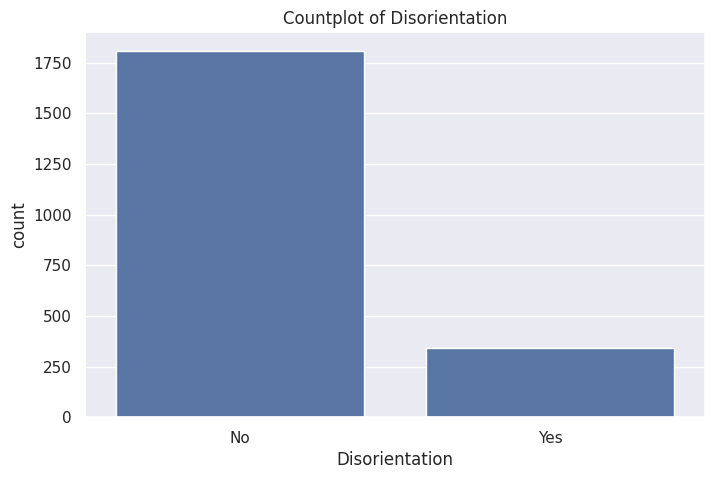

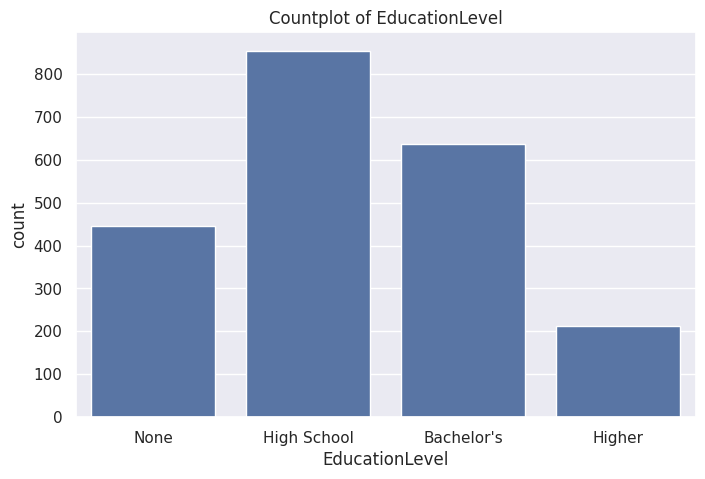

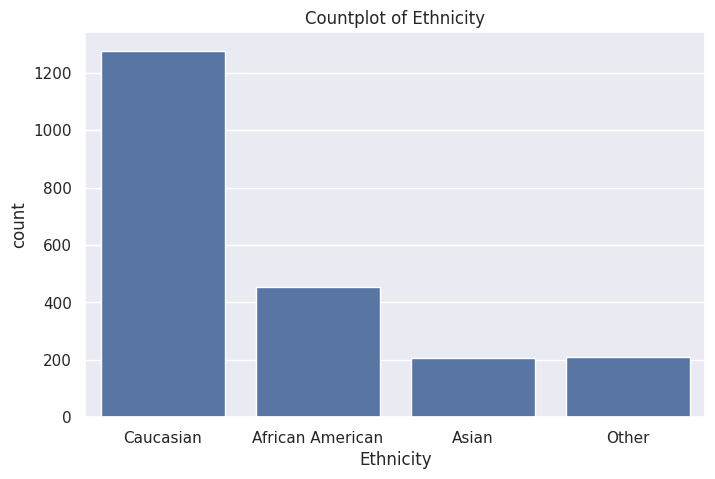

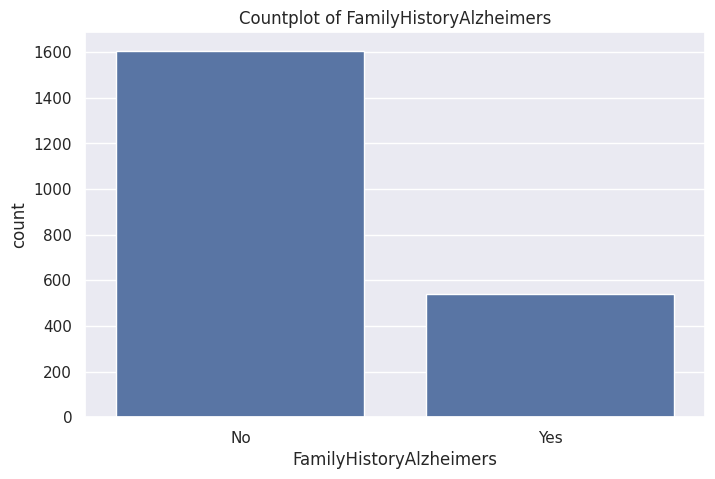

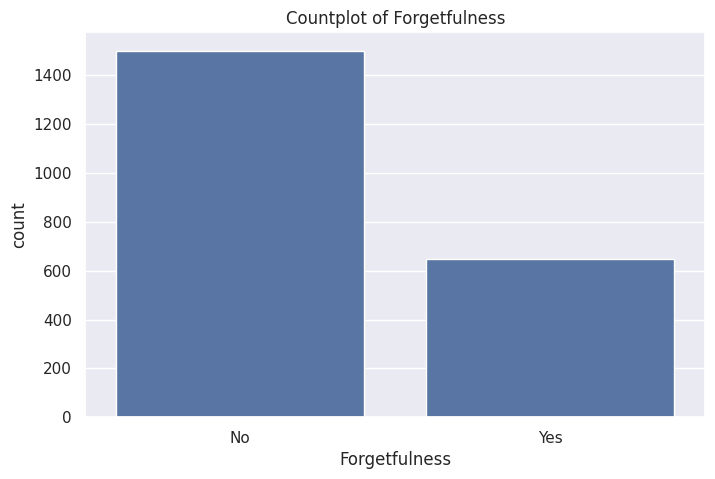

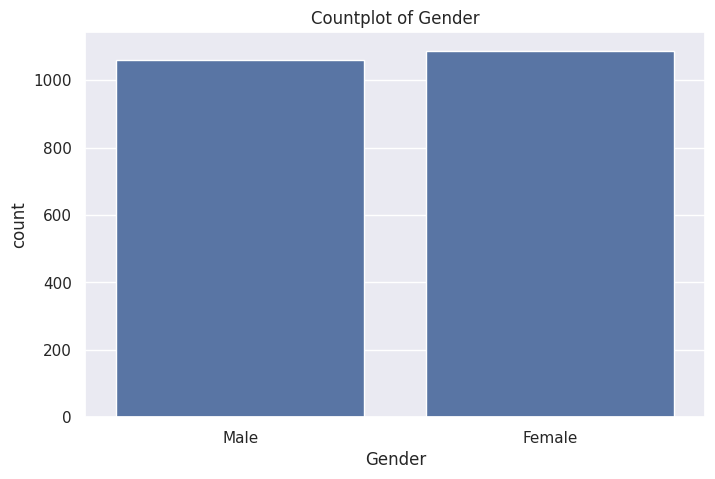

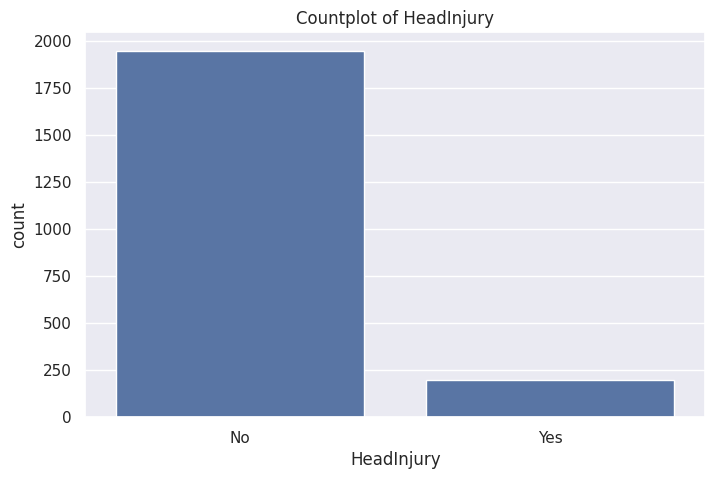

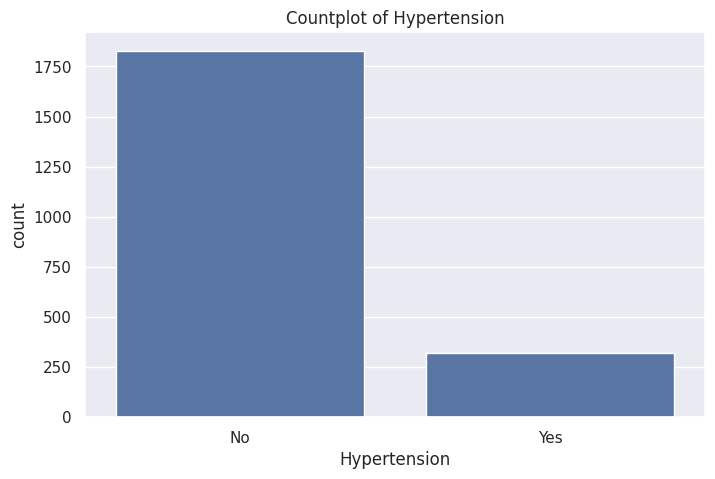

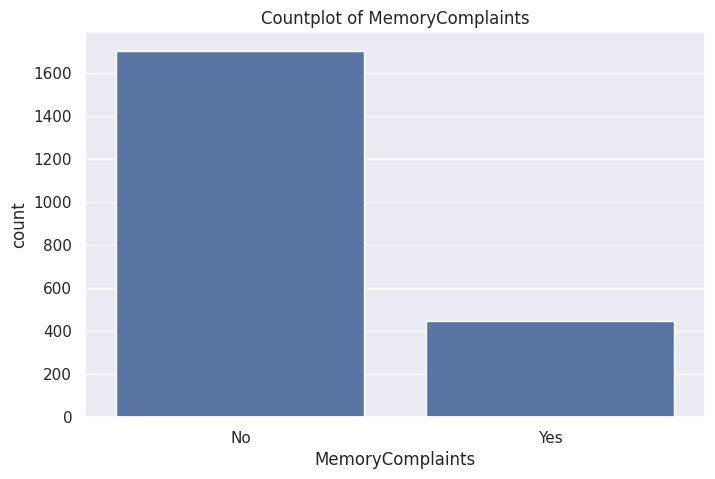

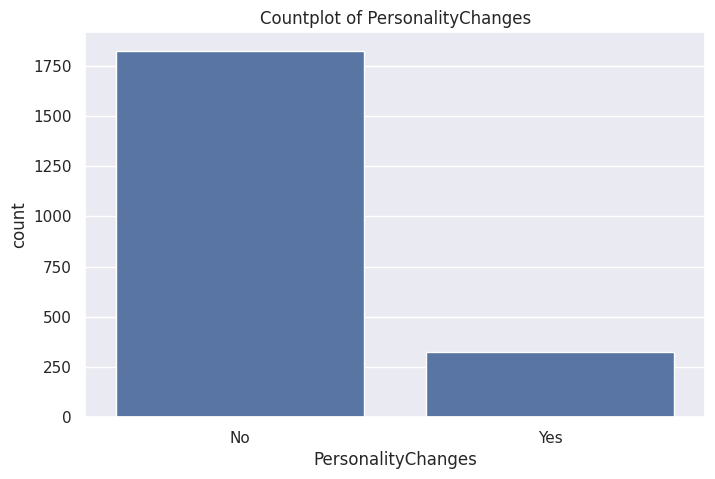

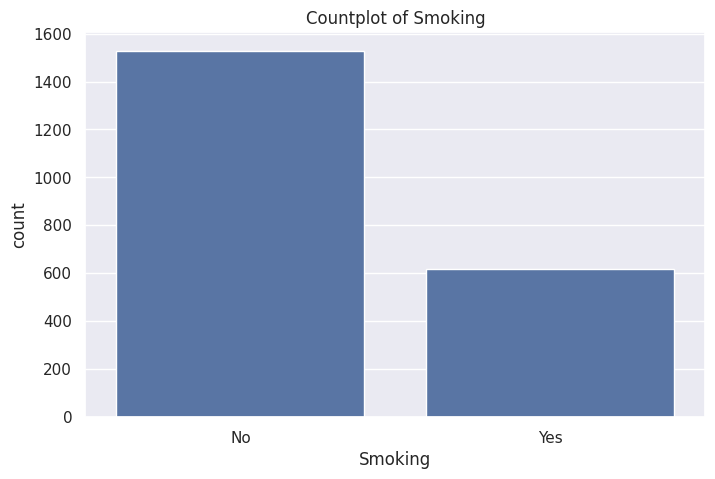

In [ ]:
# Custom labels for the categorical columns
custom_labels = {
    'Gender': ['Male', 'Female'],
    'Ethnicity': ['Caucasian', 'African American', 'Asian', 'Other'],
    'EducationLevel': ['None', 'High School', 'Bachelor\'s', 'Higher'],
    'Smoking': ['No', 'Yes'],
    'FamilyHistoryAlzheimers': ['No', 'Yes'],
    'CardiovascularDisease': ['No', 'Yes'],
    'Diabetes': ['No', 'Yes'],
    'Depression': ['No', 'Yes'],
    'HeadInjury': ['No', 'Yes'],
    'Hypertension': ['No', 'Yes'],
    'MemoryComplaints': ['No', 'Yes'],
    'BehavioralProblems': ['No', 'Yes'],
    'Confusion': ['No', 'Yes'],
    'Disorientation': ['No', 'Yes'],
    'PersonalityChanges': ['No', 'Yes'],
    'DifficultyCompletingTasks': ['No', 'Yes'],
    'Forgetfulness': ['No', 'Yes']
}

# Plot countplots for each categorical column
for column in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=column)
    plt.title(f'Countplot of {column}')

    # Directly set custom labels
    labels = custom_labels[column]
    ticks = range(len(labels))
    plt.xticks(ticks=ticks, labels=labels)

    plt.show()

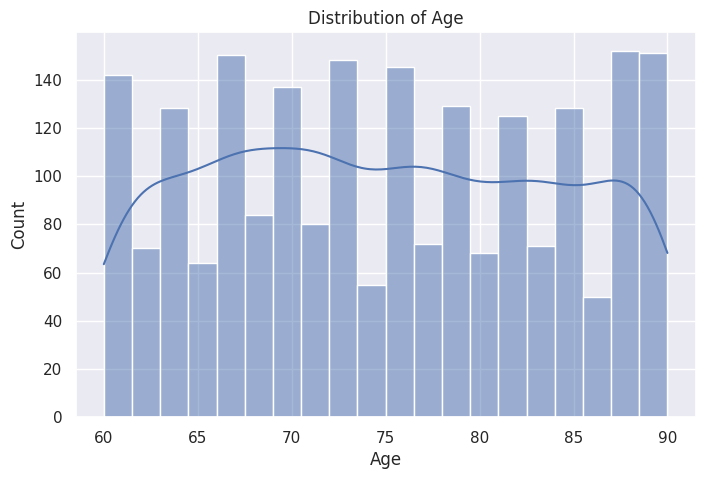

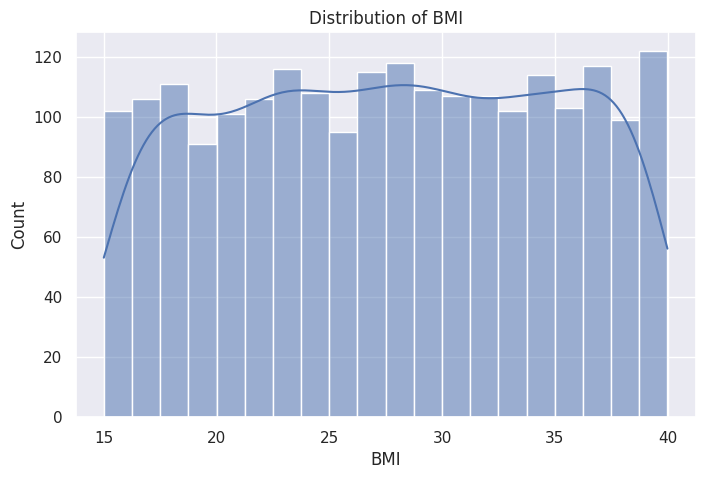

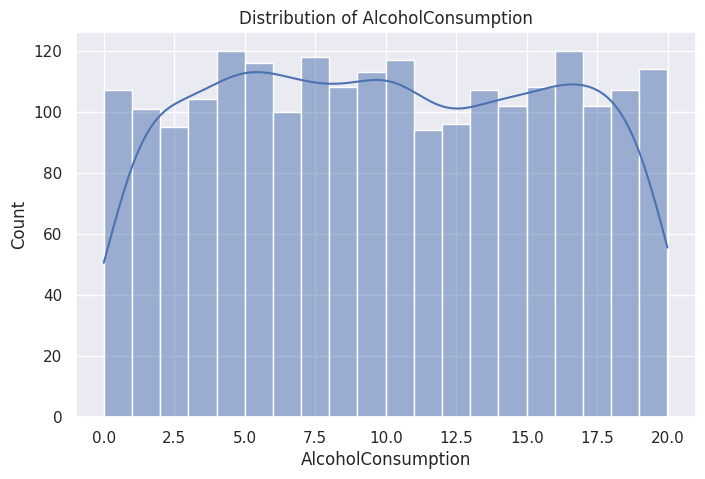

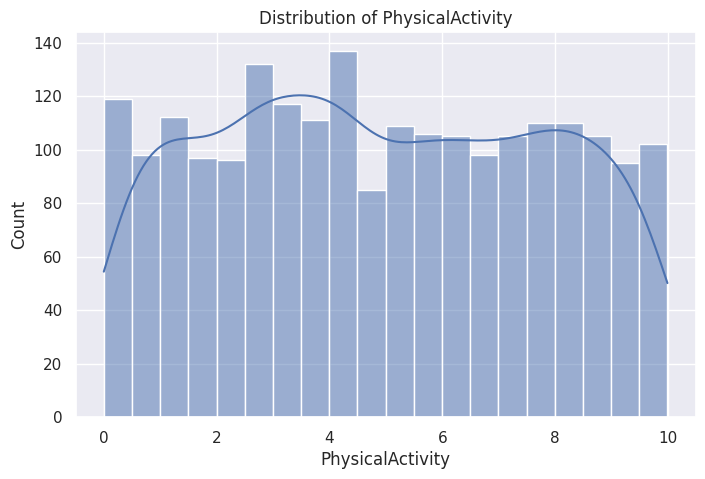

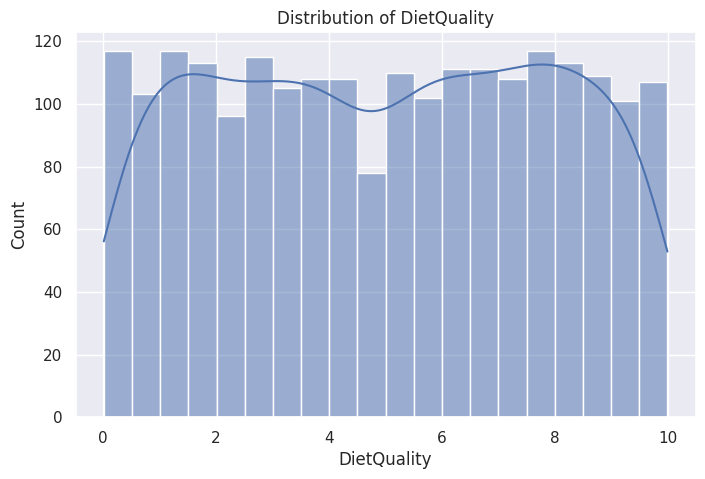

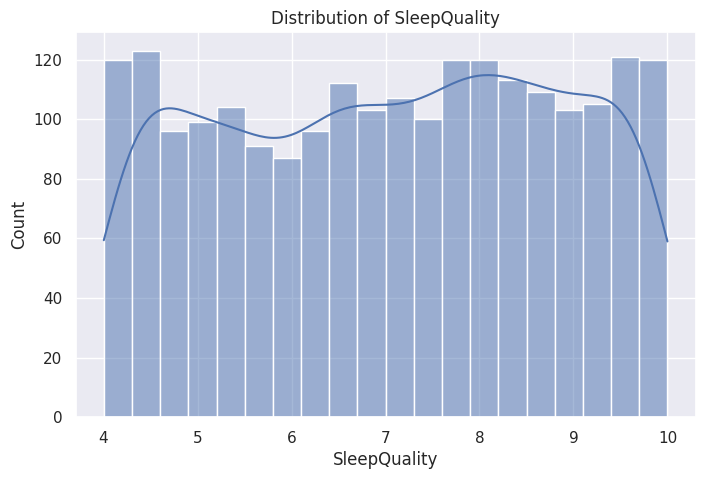

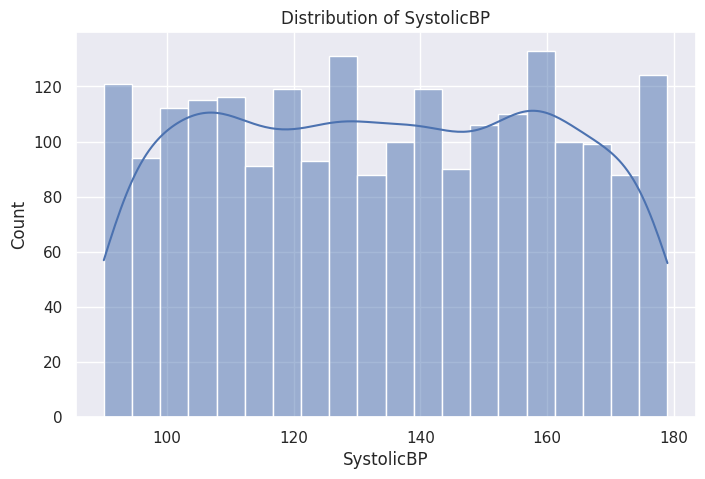

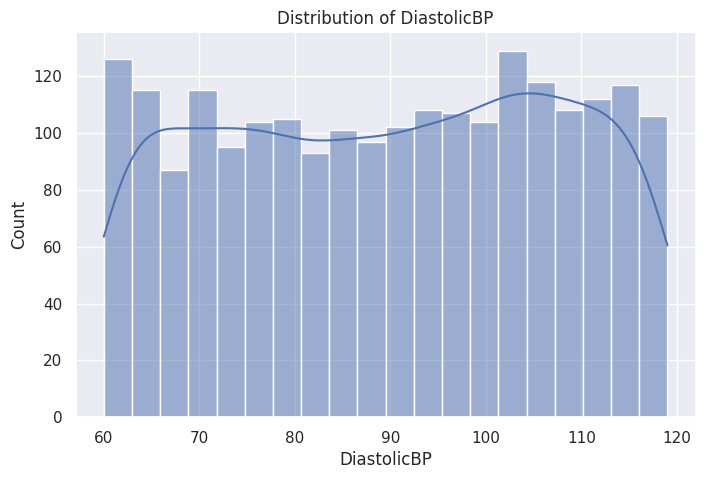

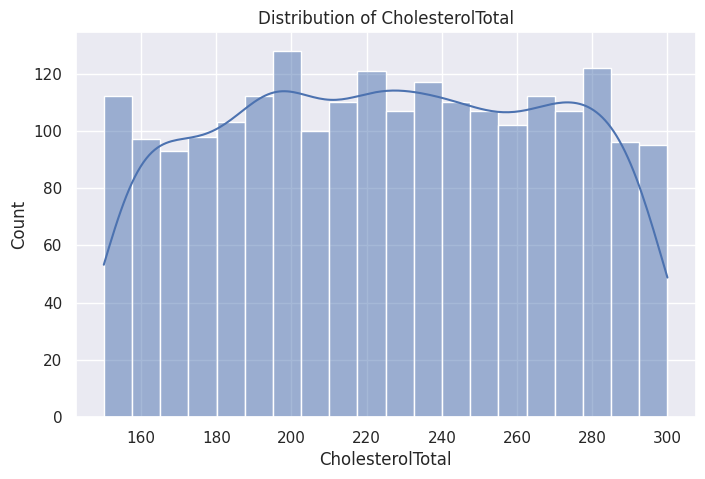

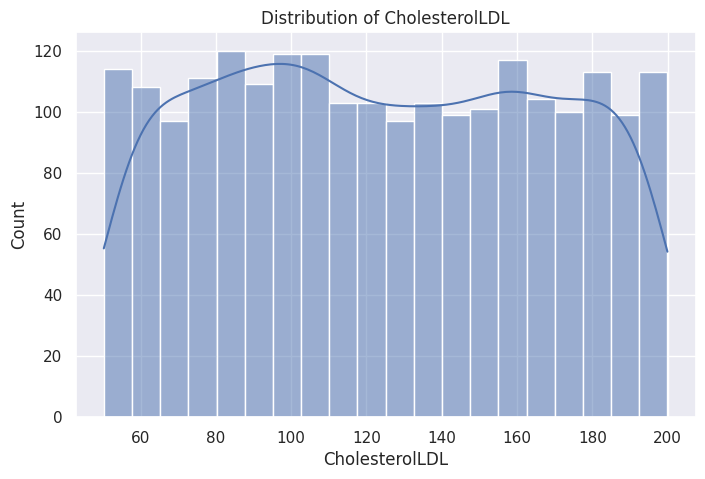

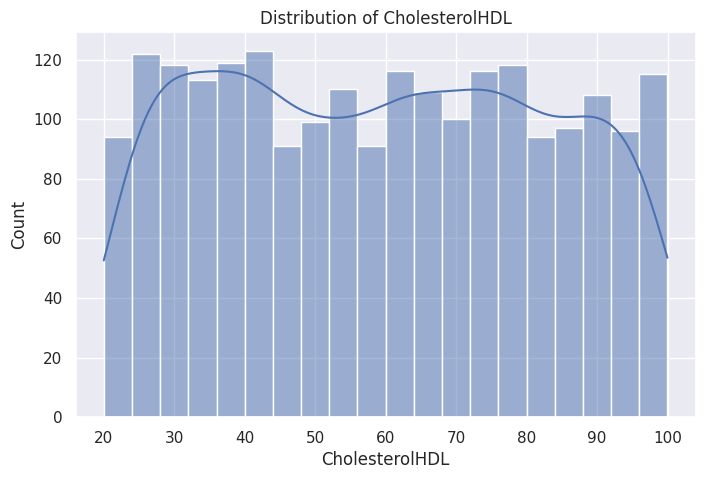

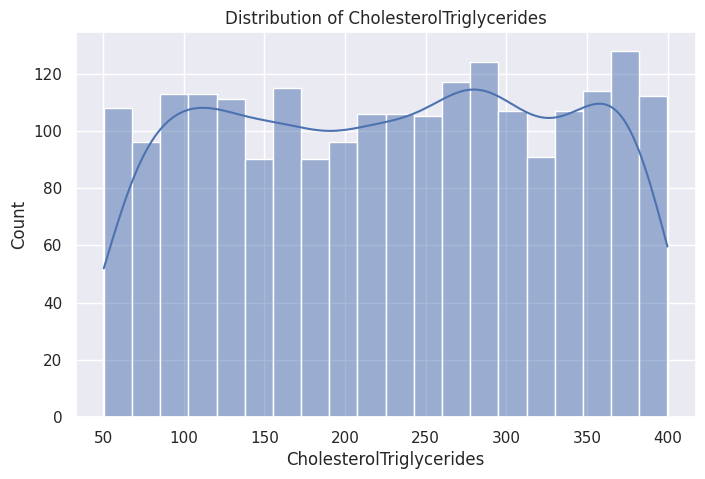

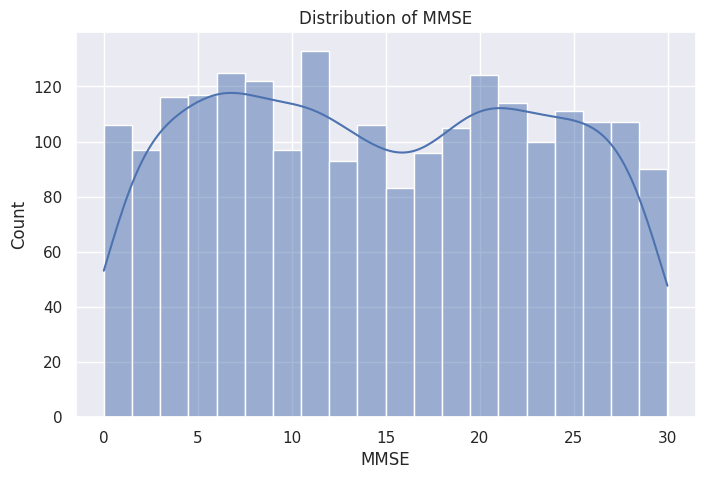

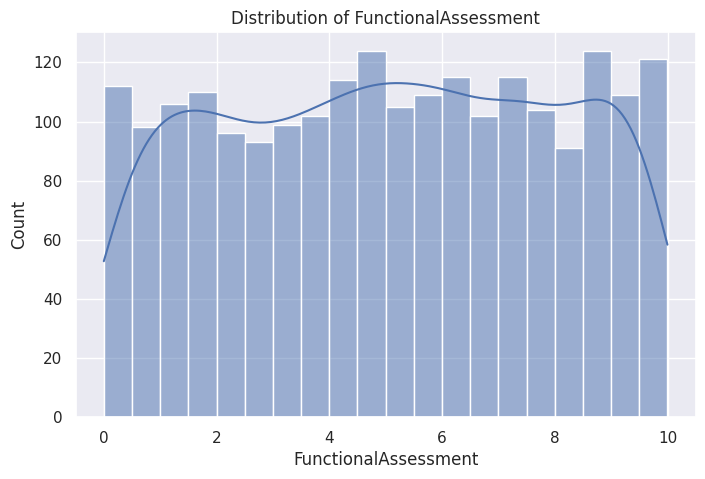

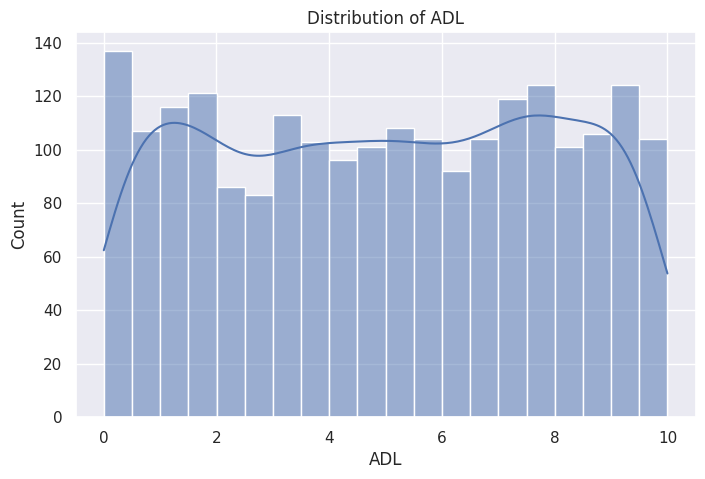

In [ ]:
# Plot histogram for each numerical column
for column in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=column, kde=True, bins=20)
    plt.title(f'Distribution of {column}')
    plt.show()

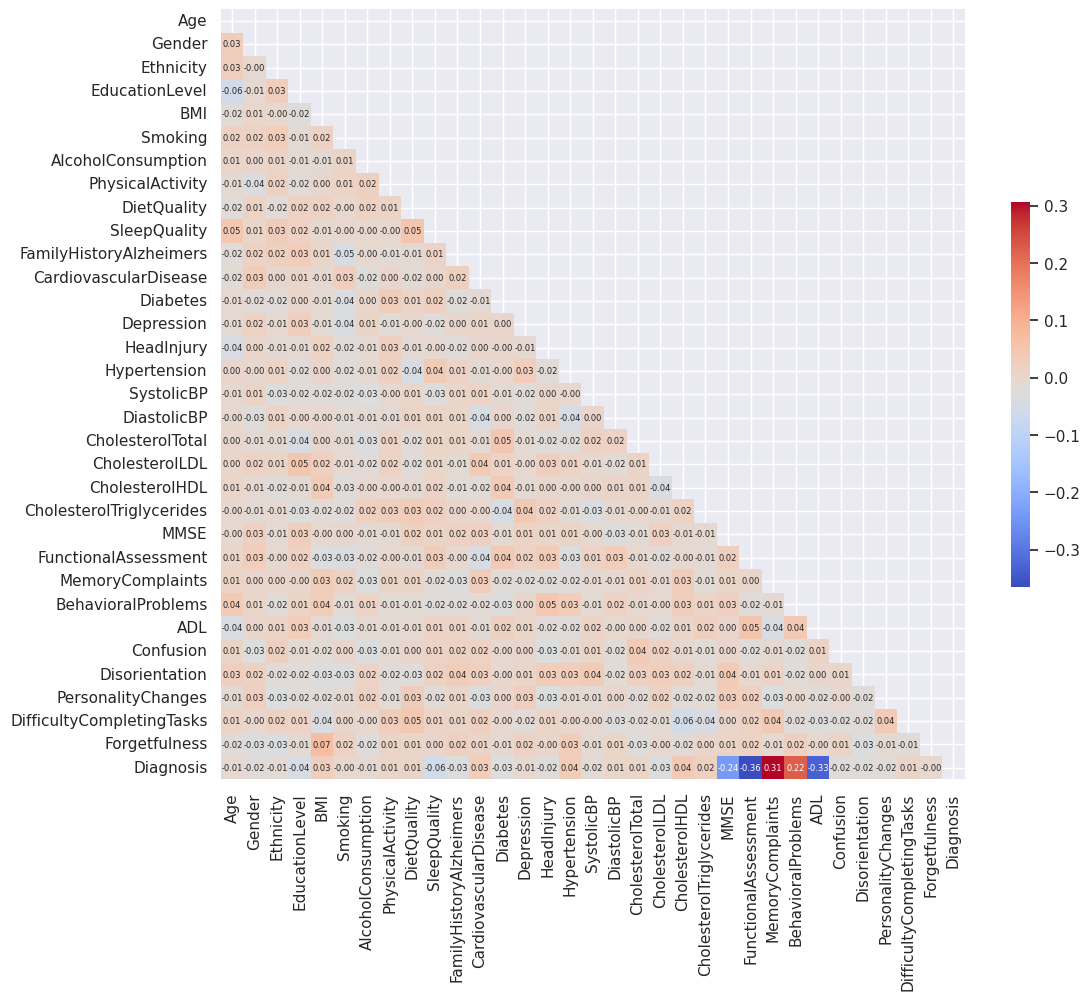

In [ ]:
# Create a mask for the upper triangle
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

# Plot heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(),cmap="coolwarm", annot=True, annot_kws={"size": 6}, fmt=".2f", cbar_kws={"shrink": .5}, mask=mask)

plt.show()

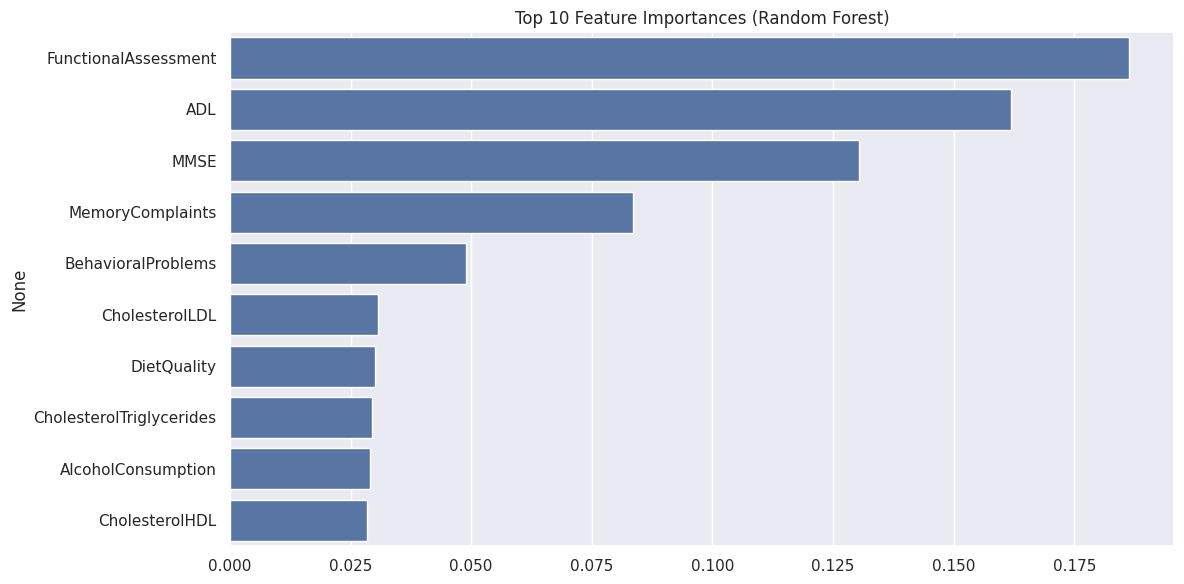

In [ ]:
X_features = df.drop(columns = ['Diagnosis'])
target_label = df['Diagnosis']

# Feature Importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_features, target_label)
importance_sorted = pd.Series(rf.feature_importances_, index=X_features.columns).sort_values(ascending=False)

# Visualisation
plt.figure(figsize=(12,6))
sns.barplot(x=importance_sorted.head(10).values, y=importance_sorted.head(10).index)
plt.title('Top 10 Feature Importances (Random Forest)')
plt.tight_layout()
plt.show()

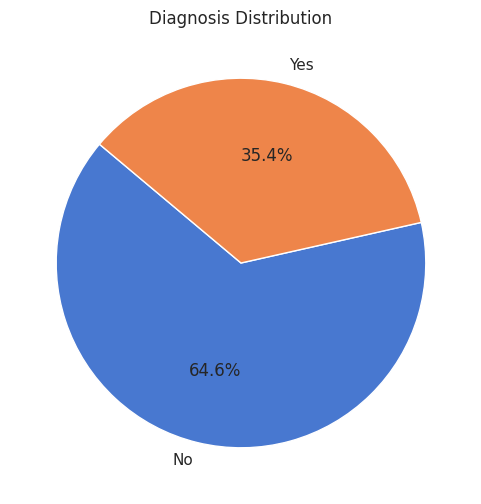

In [ ]:
# Define the Response categories and count occurences
categories = [0, 1]
counts = df.Diagnosis.value_counts().tolist()

# Choose a color palette from Seaborn for the pie chart
colors = sns.color_palette("muted")

# Plot the pie chart with the counts of each response category
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=["No", "Yes"], autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Diagnosis Distribution')
plt.show()

# Modeling


=== Logistic Regression ===
Accuracy: 0.8173
Precision: 0.6871
Recall: 0.8860
F1 Score: 0.7739
Best Parameters: {'C': 1}
Confusion Matrix:
 [[163  46]
 [ 13 101]]


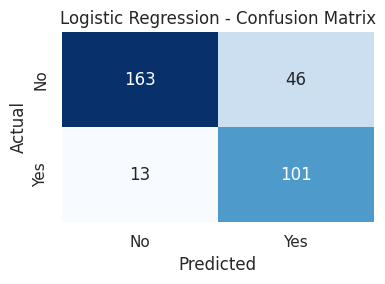


=== Random Forest ===
Accuracy: 0.9536
Precision: 0.9231
Recall: 0.9474
F1 Score: 0.9351
Best Parameters: {'max_depth': 5, 'n_estimators': 50}
Confusion Matrix:
 [[200   9]
 [  6 108]]


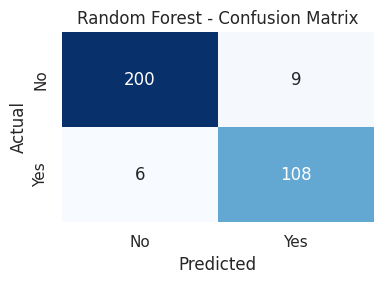


=== XGBoost ===
Accuracy: 0.9505
Precision: 0.9153
Recall: 0.9474
F1 Score: 0.9310
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}
Confusion Matrix:
 [[199  10]
 [  6 108]]


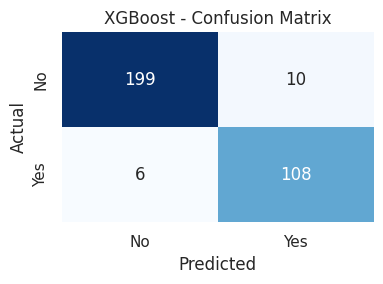


=== Best Overall Model ===
Model: Random Forest
F1 Score on Test Set: 0.9351
Best Hyperparameters: {'max_depth': 5, 'n_estimators': 50}


In [ ]:
# Select best features
selected_features = ['FunctionalAssessment', 'ADL', 'MMSE', 'MemoryComplaints', 'BehavioralProblems']
X_selected = df[selected_features]

# Split data into features and target
X_selected = df[selected_features]
y = df['Diagnosis']

# Scale the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_selected)

# Split train/validation/test
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, stratify=y, random_state=42, shuffle=True)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42, shuffle=True)
# Result: Train (70%), Validation (15%), Test (15%)

# Define hyperparameter grids for each model
param_grids = {
    'Logistic Regression': {'C': [0.1, 1, 10]},
    'Random Forest': {'n_estimators': [50, 100, 200],
                      'max_depth': [3, 5, 7, 12]},
    'XGBoost': {'n_estimators': [50, 100, 200],
                'learning_rate': [0.01, 0.1, 1],
                'max_depth': [3, 5, 7]}
}

# Instantiate classification models with default parameters
models = {
    'Logistic Regression': LogisticRegression(class_weight='balanced'),
    'Random Forest': RandomForestClassifier(class_weight='balanced'),
    'XGBoost': XGBClassifier(),
}

# Initialize variables to track the overall best model
overall_best_model = None
overall_best_f1 = -1
overall_best_name = ''
overall_best_params = None

# Loop through each model
for name, model_base in models.items():
    print(f'\n=== {name} ===')
    best_f1 = -1
    best_model = None
    best_params = None

    for params in ParameterGrid(param_grids[name]):
        model = model_base.__class__(**params)  # Create new model instance with current params
        if name != 'XGBoost':
            model.set_params(class_weight='balanced')  # Ensure class_weight is retained

        model.fit(X_train, y_train)
        y_val_pred = model.predict(X_val)
        f1 = f1_score(y_val, y_val_pred)

        if f1 > best_f1:
            best_f1 = f1
            best_model = model
            best_params = params

    # Evaluate best model on test set
    y_test_pred = best_model.predict(X_test)
    y_test_proba = best_model.predict_proba(X_test)[:, 1] if hasattr(best_model, "predict_proba") else None

    acc = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    cm = confusion_matrix(y_test, y_test_pred)

    # Display results
    print(f'Accuracy: {acc:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print(f'Best Parameters: {best_params}')
    print('Confusion Matrix:\n', cm)

    # Plot Confusion Matrix
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xticks(ticks=[0.5, 1.5], labels=['No', 'Yes'])
    plt.yticks(ticks=[0.5, 1.5], labels=['No', 'Yes'])
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

    # Update overall best model based on test F1 score
    if f1 > overall_best_f1:
        overall_best_model = best_model
        overall_best_f1 = f1
        overall_best_name = name
        overall_best_params = best_params

# Summary of best overall model
print('\n=== Best Overall Model ===')
print(f'Model: {overall_best_name}')
print(f'F1 Score on Test Set: {overall_best_f1:.4f}')
print(f'Best Hyperparameters: {overall_best_params}')

In [ ]:
import joblib

# Save both model and parameters
save_bundle = {
    'model': overall_best_model,
    'scaler': scaler,
    'params': overall_best_params,
    'name': overall_best_name,  # Optional: include the model type
    'f1_score': overall_best_f1  # Optional: include F1 score for reference
}

joblib.dump(save_bundle, 'best_model_bundle.pkl')
print("Model and parameters saved as 'best_model_bundle.pkl'")


Model and parameters saved as 'best_model_bundle.pkl'


# Demo

In [ ]:
%%writefile app.py
import streamlit as st
import joblib
import numpy as np

# Load the model and metadata
bundle = joblib.load("best_model_bundle.pkl")
model = bundle['model']
scaler = bundle['scaler']

st.title("Alzheimer Diagnosis Prediction")

st.markdown("Please enter the patient's assessment values:")

# Create input fields
fa = st.number_input("Functional Assessment (0–10)", min_value=0.0, max_value=10.0, value=5.0)
adl = st.number_input("Activities of Daily Living (ADL) Score (0–10)", min_value=0.0, max_value=10.0, value=5.0)
mmse = st.number_input("MMSE Score (0–30)", min_value=0.0, max_value=30.0, value=20.0)
memory = st.selectbox("Memory Complaints", ["No", "Yes"])
behavior = st.selectbox("Behavioral Problems", ["No", "Yes"])

# Encode categorical inputs
memory_enc = 1 if memory == "Yes" else 0
behavior_enc = 1 if behavior == "Yes" else 0

# Prepare input data
input_array = np.array([[fa, adl, mmse, memory_enc, behavior_enc]])

# Apply scaler
input_scaled = scaler.transform(input_array)

# Predict and display results
if st.button("Predict"):
    prediction = model.predict(input_scaled)[0]
    label = "Positive Diagnosis" if prediction == 1 else "Negative Diagnosis"
    st.success(f"Prediction: {label}")

    if hasattr(model, 'predict_proba'):
        proba = model.predict_proba(input_scaled)[0]
        st.write(f"Confidence:")
        st.write(f"- Negative Diagnosis: {proba[0]:.2f}")
        st.write(f"- Positive Diagnosis: {proba[1]:.2f}")


Writing app.py
